## Create the figures used in Stochastic Variance Reduced Gradient Plug-and-Play Methods for Solving Image Reconnstruction Problems

In [1]:
%matplotlib inline 

from imports import *

print('cuda' if torch.cuda.is_available() else 'cpu')

Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
                 It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe
cuda


# Figures 1 + 2: Compare Image Fidelity for Different Algorithms and Compare PSNR over time using NLM

In [2]:
MASK = generate_mask()
res = create_problem(img_path='./data/Set12/13.jpg', sigma=1.0, mask_=MASK)
denoise_parameters = nlm_config()

In [3]:
z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(res, 'nlm', denoise_parameters, 0.095, 10, 10, 10000, False)

In [4]:
z_GD, time_GD, psnr_GD, zs_GD = pnp_gd(res, 'nlm', denoise_parameters, 0.8, 100, False)

In [5]:
z_SGD, time_SGD, psnr_SGD, zs_SGD = pnp_sgd(res, 'nlm', denoise_parameters, 0.8, 100, 10000, False)

In [6]:
z_LSVRG, time_LSVRG, psnr_LSVRG, zs_LSVRG = pnp_lsvrg(res, 'nlm', denoise_parameters, 0.095, 10, 10000, 0.1, False)

AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

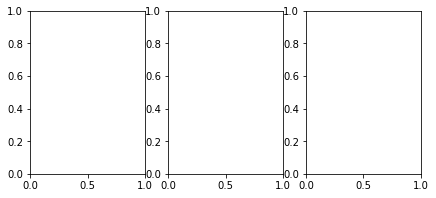

In [7]:
show_multiple([res['original'], res['noisy'], z_SVRG])

## Figure 3: Compare Image Denoising Routines with PnP-SVRG

In [ ]:
MASK = generate_mask()
res = create_problem(img_path='./data/Set12/13.jpg', sigma=1.0, mask_=MASK)
denoise_parameters = nlm_config()

In [ ]:
z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(res, 'nlm', denoise_parameters, 0.095, 10, 10, 10000, False)

In [ ]:
z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(res, 'cnn', denoise_parameters, 0.095, 10, 10, 10000, False)

In [ ]:
z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(res, 'bm3d', denoise_parameters, 0.095, 10, 10, 10000, False)

In [ ]:
z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(res, 'tv', denoise_parameters, 0.095, 10, 10, 10000, False)

In [ ]:
show_multiple(res['original'])

## Figure 4: Compare Sampling Ratio for each PnP Algorithm

In [ ]:
num_probs = 100
num_trials = 10
sample_probs = np.linspace(0.2, 1, num_probs)

prob_vs_psnr_SVRG = []
prob_vs_psnr_GD = []
prob_vs_psnr_SGD = []
prob_vs_psnr_LSVRG = []

for i in range(num_probs):
    samp_ratio_SVRG = []
    samp_ratio_GD = []
    samp_ratio_SGD = []
    samp_ratio_LSVRG = []
    for j in range(num_trials):
        MASK = generate_mask(height=256, width=256, sample_prob=sample_probs[i])
        res = create_problem(img_path='./data/Set12/13.jpg', sigma=1.0, mask_=MASK)
        denoise_parameters = nlm_config()

        z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(res, 'nlm', denoise_parameters, 0.095, 10, 10, 10000, False)
        samp_ratio_SVRG.append(psnr_SVRG[-1])

        z_GD, time_GD, psnr_GD, zs_GD = pnp_gd(res, 'nlm', denoise_parameters, 0.8, 100, False)
        samp_ratio_GD.append(psnr_GD[-1])

        z_SGD, time_SGD, psnr_SGD, zs_SGD = pnp_sgd(res, 'nlm', denoise_parameters, 0.8, 100, 10000, False)
        samp_ratio_SGD.append(psnr_SGD[-1])

        z_LSVRG, time_LSVRG, psnr_LSVRG, zs_LSVRG = pnp_lsvrg(res, 'nlm', denoise_parameters, 0.095, 10, 10000, 0.1, False)
        samp_ratio_LSVRG.append(psnr_LSVRG[-1])
    prob_vs_psnr_SVRG.append(np.average(samp_ratio_SVRG))
    prob_vs_psnr_GD.append(np.average(samp_ratio_GD))
    prob_vs_psnr_SGD.append(np.average(samp_ratio_SGD))
    prob_vs_psnr_LSVRG.append(np.average(samp_ratio_LSVRG))
# PLOT CURVES